In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
from sklearn.ensemble import ExtraTreesClassifier as ETC
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.manifold import TSNE

plt.rcParams['figure.figsize'] = [15, 10]

In [2]:
qpes = np.loadtxt(os.getcwd()[:-21]+'feature_extraction/QPE_sim_lcsoft_dt250_feats.csv',delimiter=',')
qpeh = np.loadtxt(os.getcwd()[:-21]+'feature_extraction/QPE_sim_lchard_dt250_feats.csv',delimiter=',')
qpef = np.loadtxt(os.getcwd()[:-21]+'feature_extraction/QPE_sim_lcfull_dt250_feats.csv',delimiter=',')
npes = np.loadtxt(os.getcwd()[:-21]+'feature_extraction/nPE_sim_lcsoft_dt250_feats.csv',delimiter=',')
npeh = np.loadtxt(os.getcwd()[:-21]+'feature_extraction/nPE_sim_lchard_dt250_feats.csv',delimiter=',')
npef = np.loadtxt(os.getcwd()[:-21]+'feature_extraction/nPE_sim_lcfull_dt250_feats.csv',delimiter=',')

In [3]:
qpes_lc = np.loadtxt(os.getcwd()[:-21]+'training_data/QPE/QPE_sim_lcsoft_dt250.csv',delimiter=',')
qpeh_lc = np.loadtxt(os.getcwd()[:-21]+'training_data/QPE/QPE_sim_lchard_dt250.csv',delimiter=',')
qpef_lc = np.loadtxt(os.getcwd()[:-21]+'training_data/QPE/QPE_sim_lcfull_dt250.csv',delimiter=',')
npes_lc = np.loadtxt(os.getcwd()[:-21]+'training_data/QPE/nPE_sim_lcsoft_dt250.csv',delimiter=',')
npeh_lc = np.loadtxt(os.getcwd()[:-21]+'training_data/QPE/nPE_sim_lchard_dt250.csv',delimiter=',')
npef_lc = np.loadtxt(os.getcwd()[:-21]+'training_data/QPE/nPE_sim_lcfull_dt250.csv',delimiter=',')

In [4]:
all_feats = np.zeros((20000,128),dtype=object)
all_feats[:,0] = np.arange(20000,dtype=int)
all_feats[:10000,1:43] = qpef
all_feats[:10000,43:85] = qpes
all_feats[:10000,85:127] = qpeh
all_feats[:10000,127] = 'QPE'
all_feats[10000:,1:43] = npef
all_feats[10000:,43:85] = npes
all_feats[10000:,85:127] = npeh
all_feats[10000:,127] = 'nP'

In [5]:
np.random.shuffle(all_feats)

In [6]:
train_data = all_feats[:16000,1:127]
train_labels = all_feats[:16000,127]
test_data = all_feats[16000:,1:127]
test_labels = all_feats[16000:,127]

In [7]:
et = ETC()
et.fit(train_data,train_labels)
et.score(test_data,test_labels)

0.98975

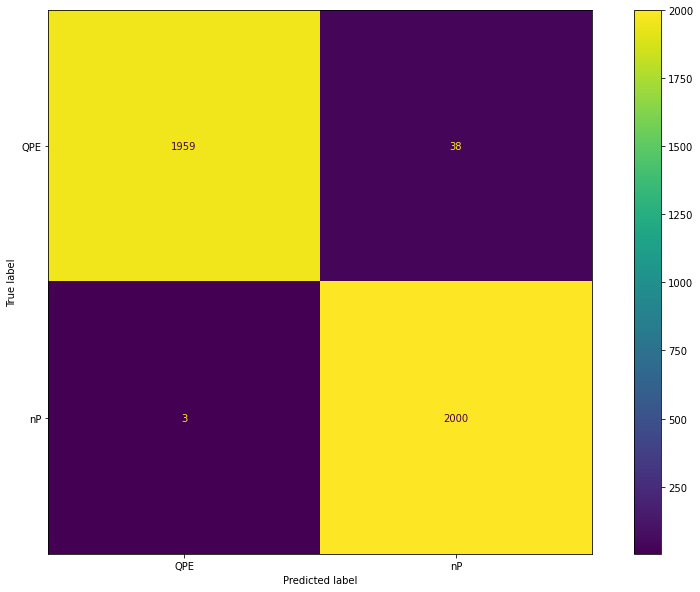

In [8]:
test_preds = et.predict(test_data)
confmat = confusion_matrix(test_labels,test_preds,labels=et.classes_)

cm_display = ConfusionMatrixDisplay(confmat,display_labels=et.classes_).plot()

In [9]:
bad_preds = np.where(test_preds != test_labels)[0]
bad_pred_lc_nos = sorted(all_feats[16000:,0][bad_preds])
len(bad_pred_lc_nos)

41

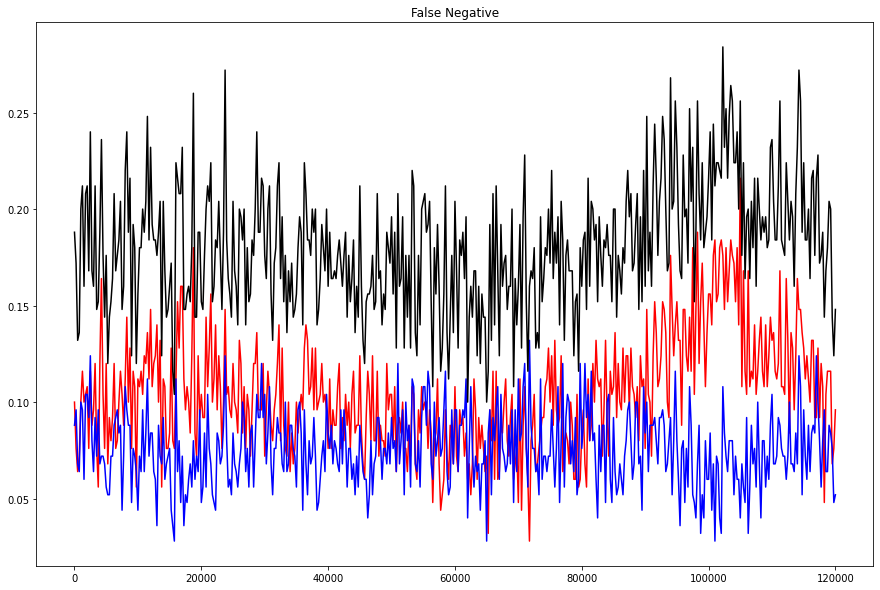

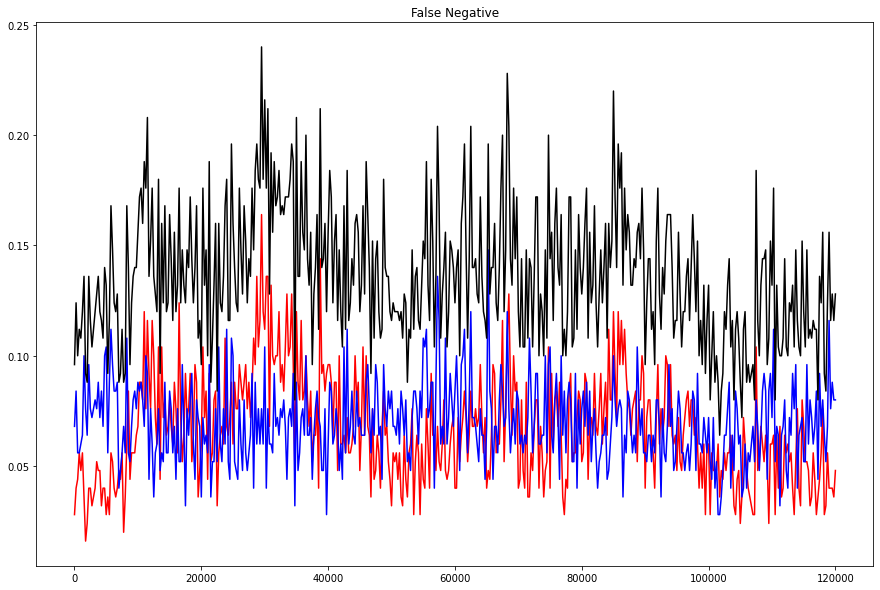

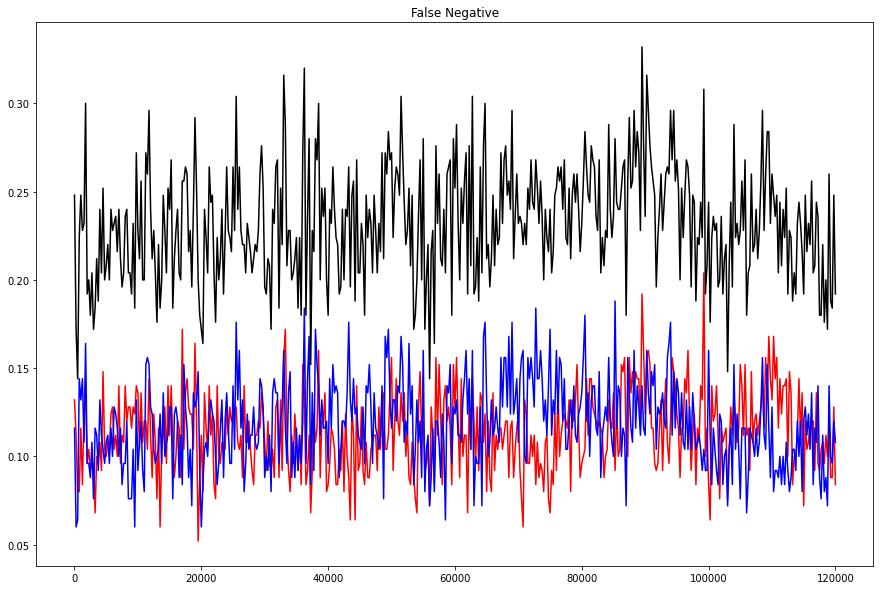

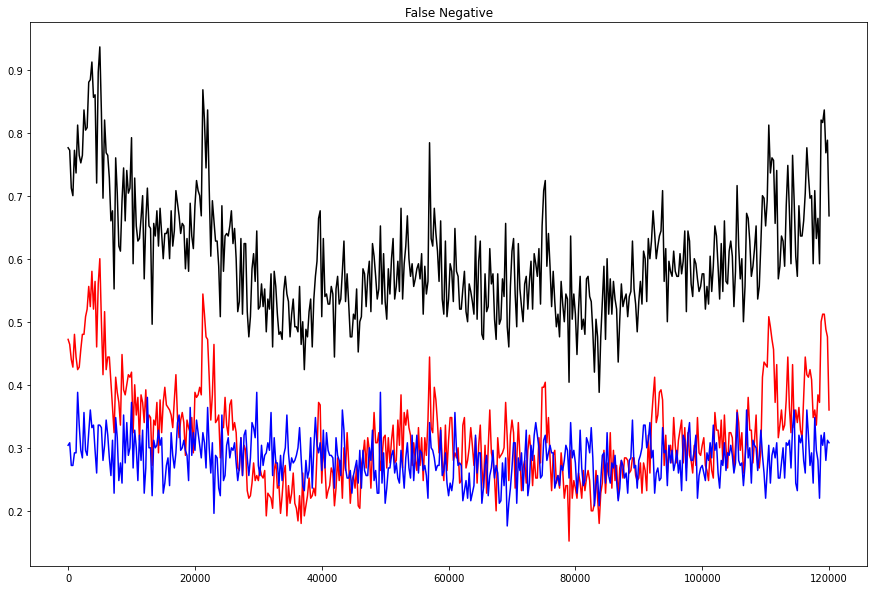

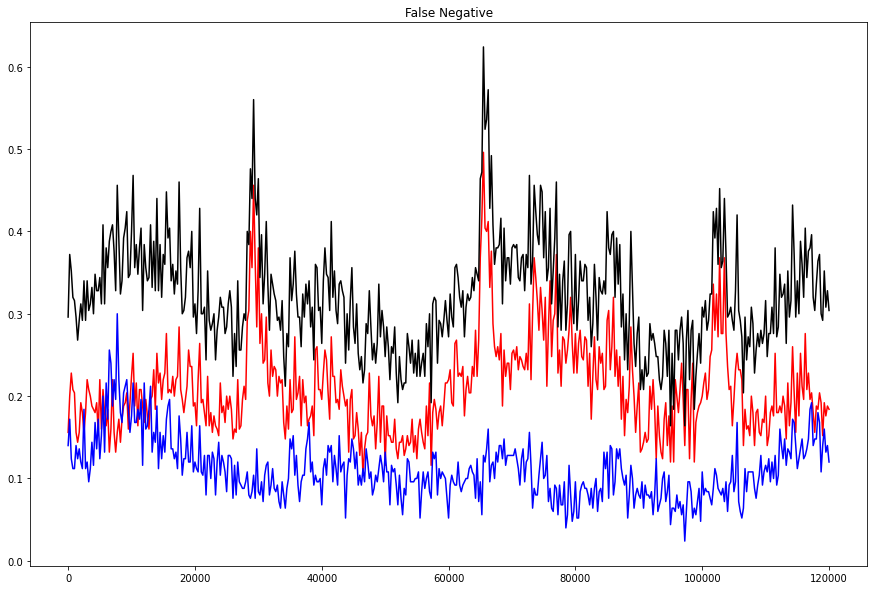

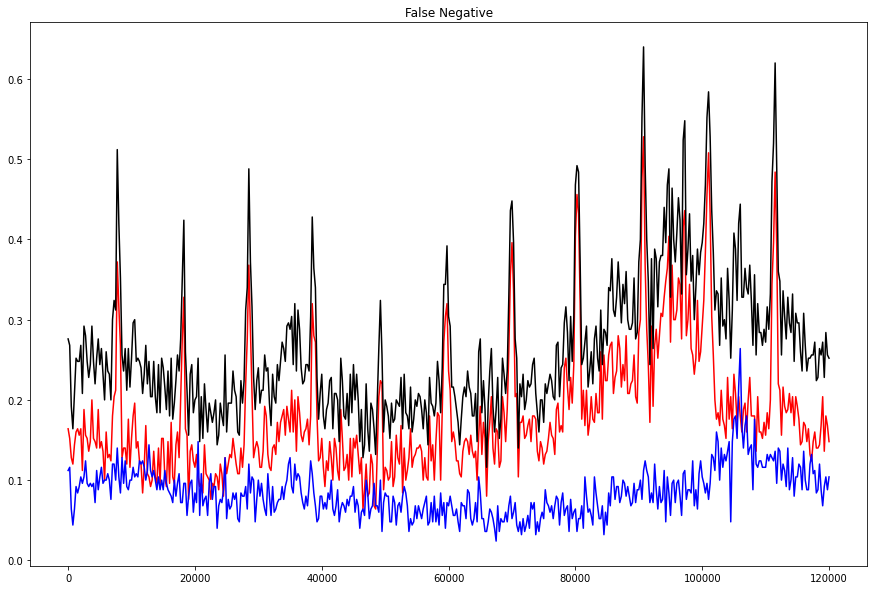

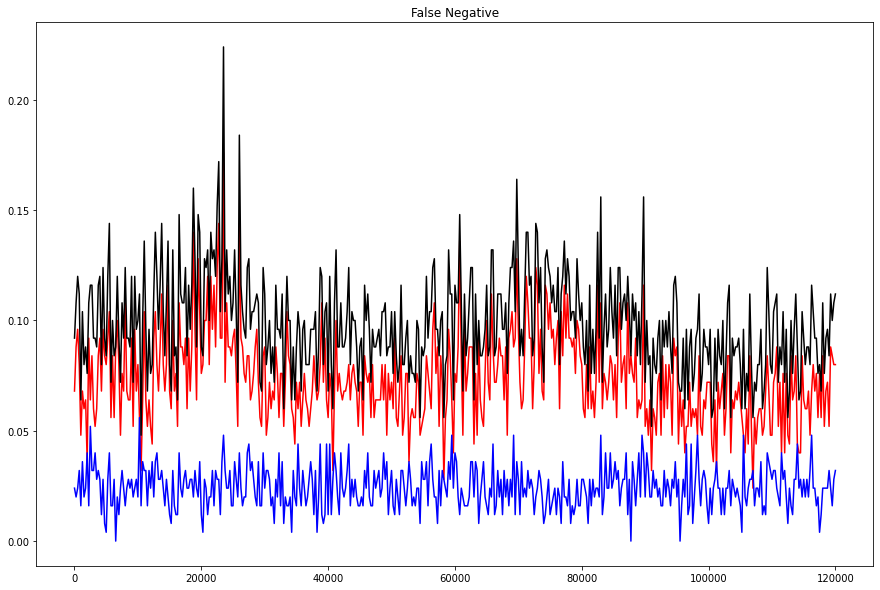

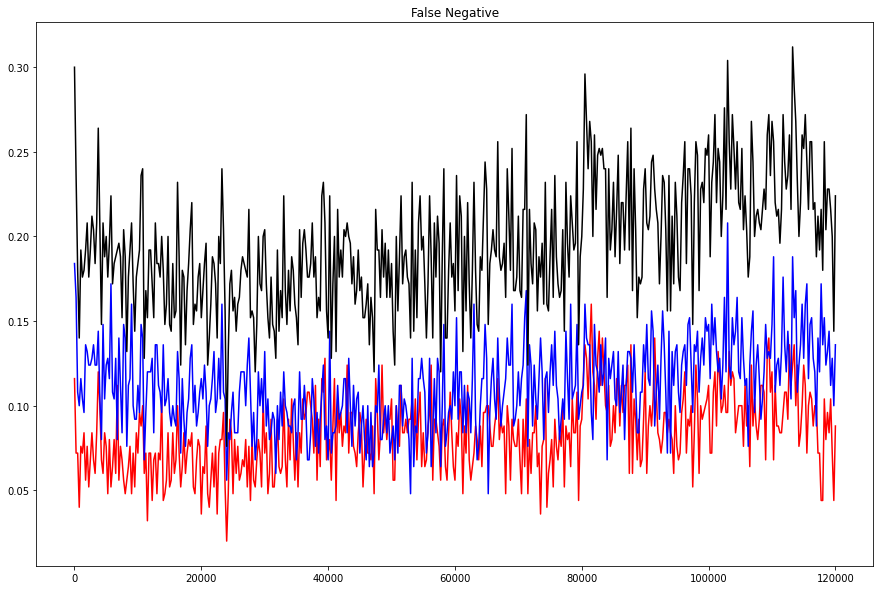

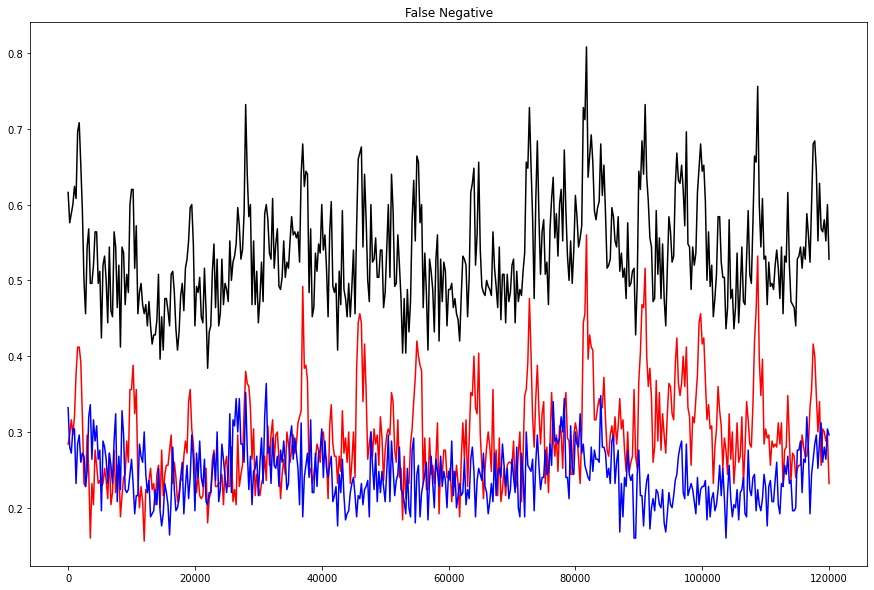

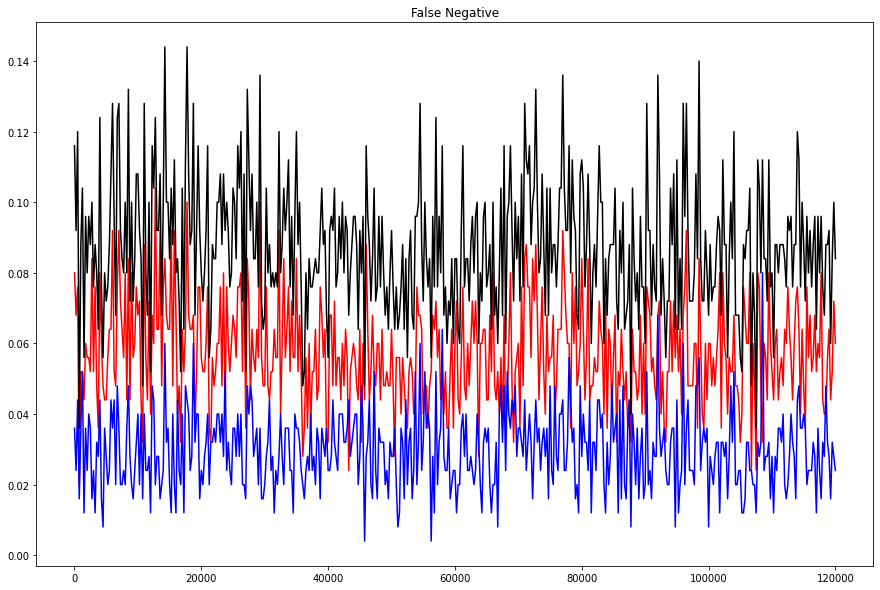

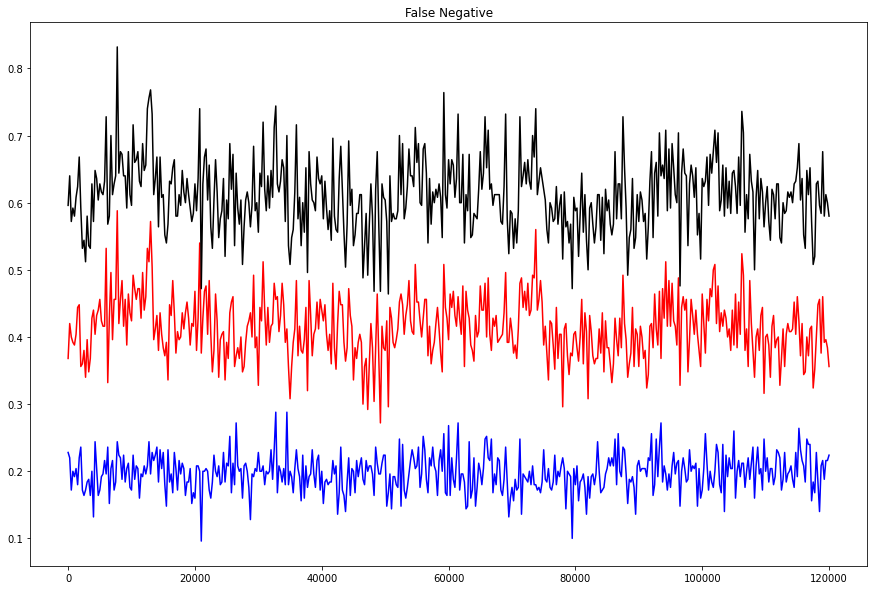

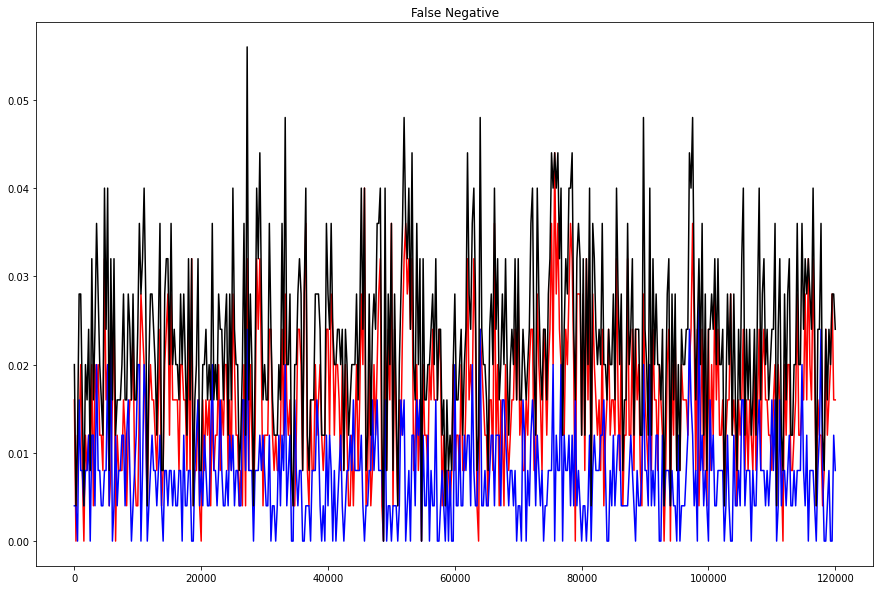

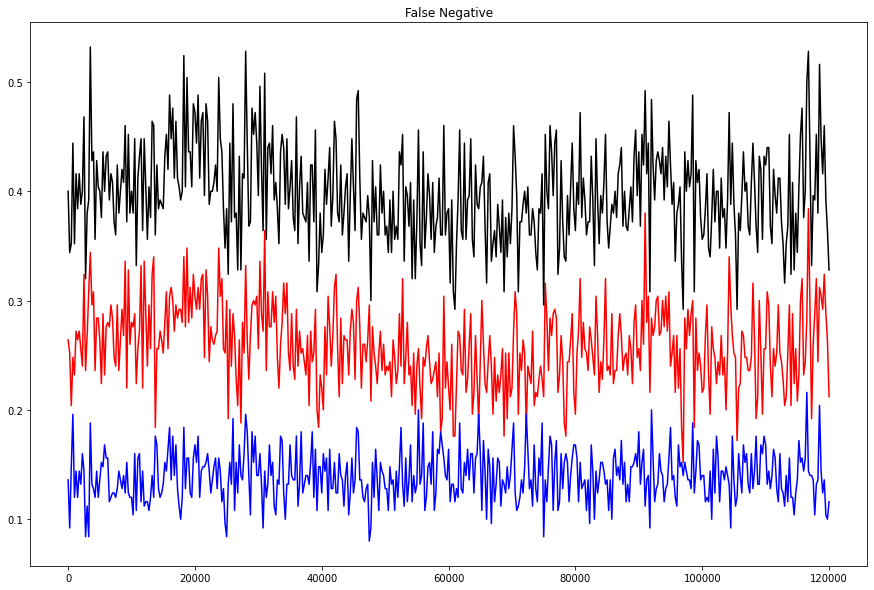

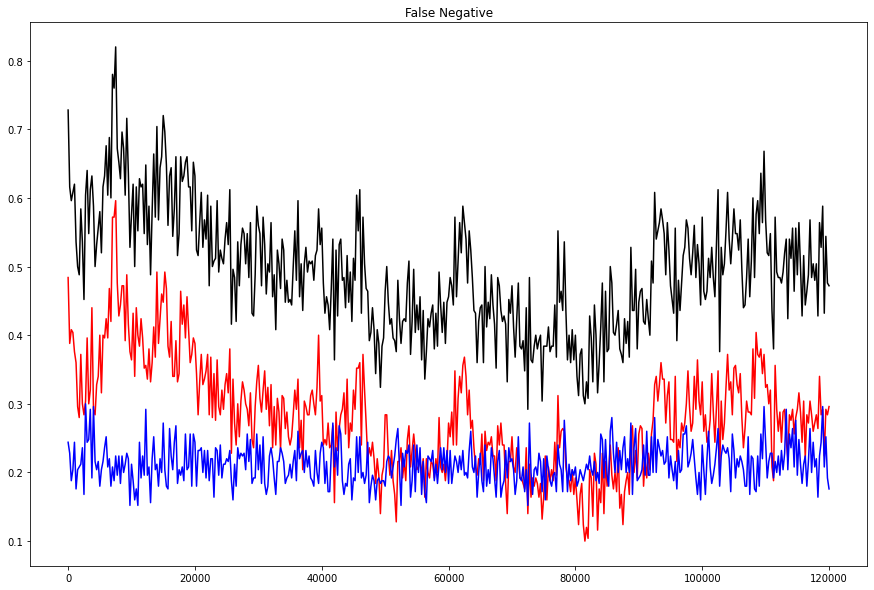

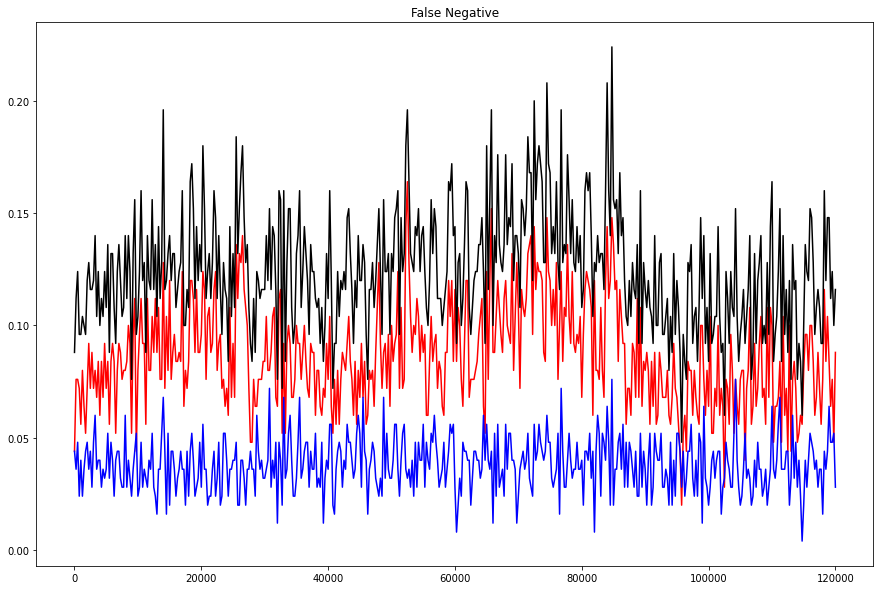

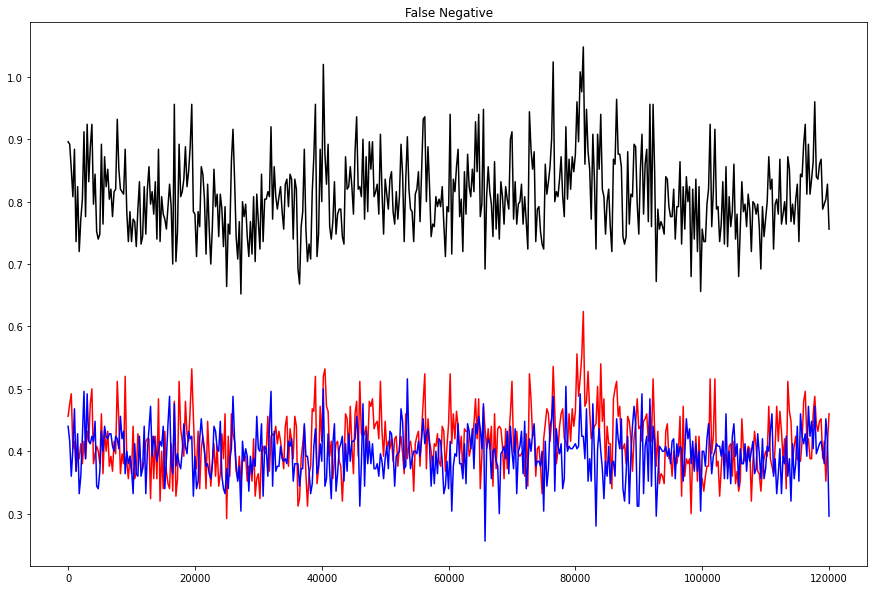

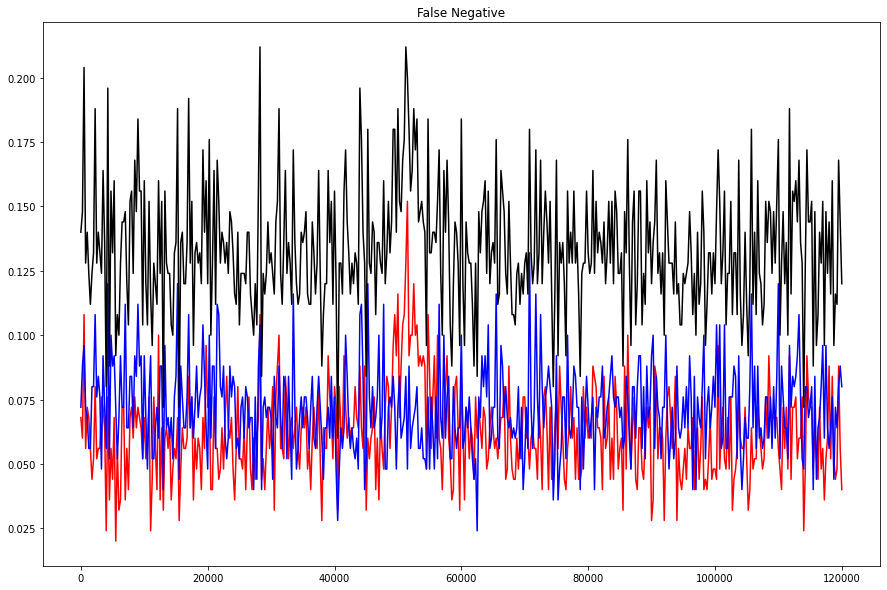

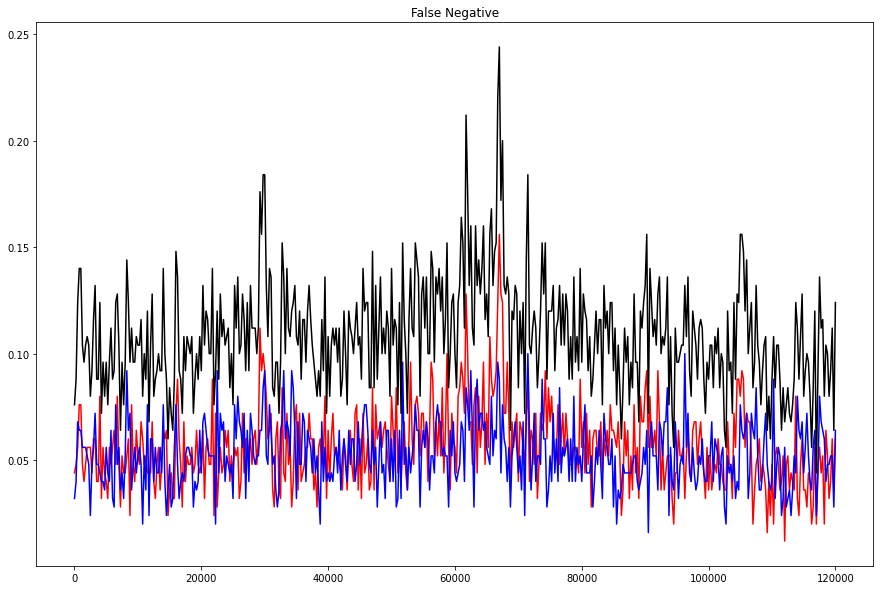

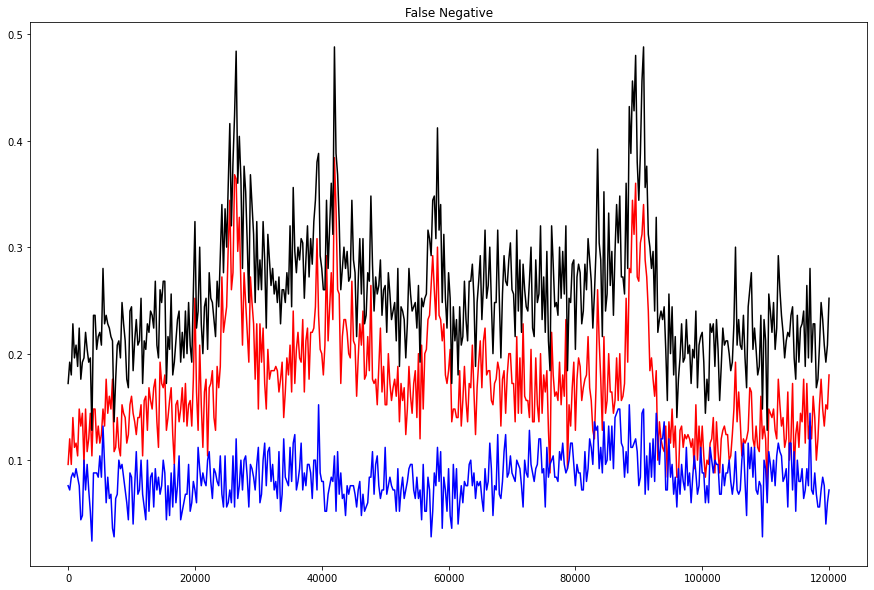

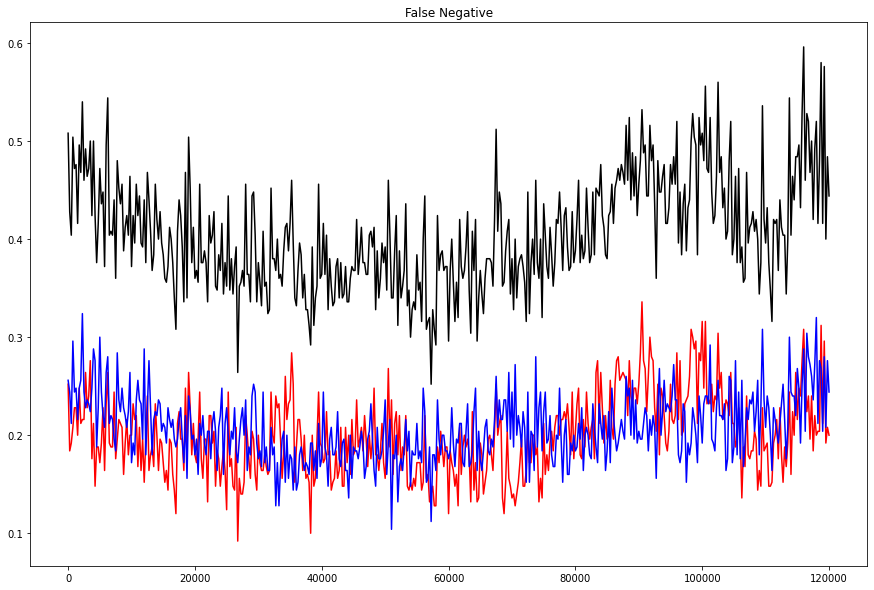

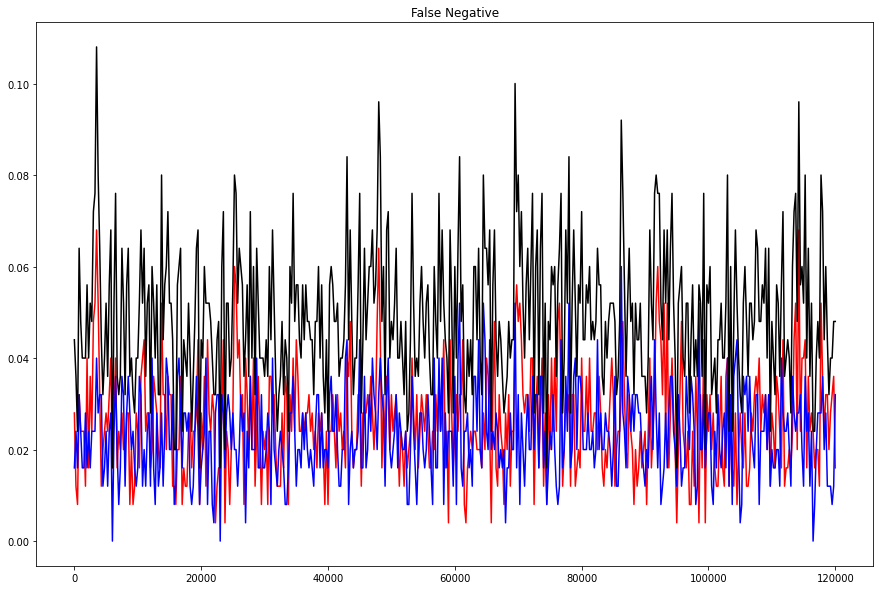

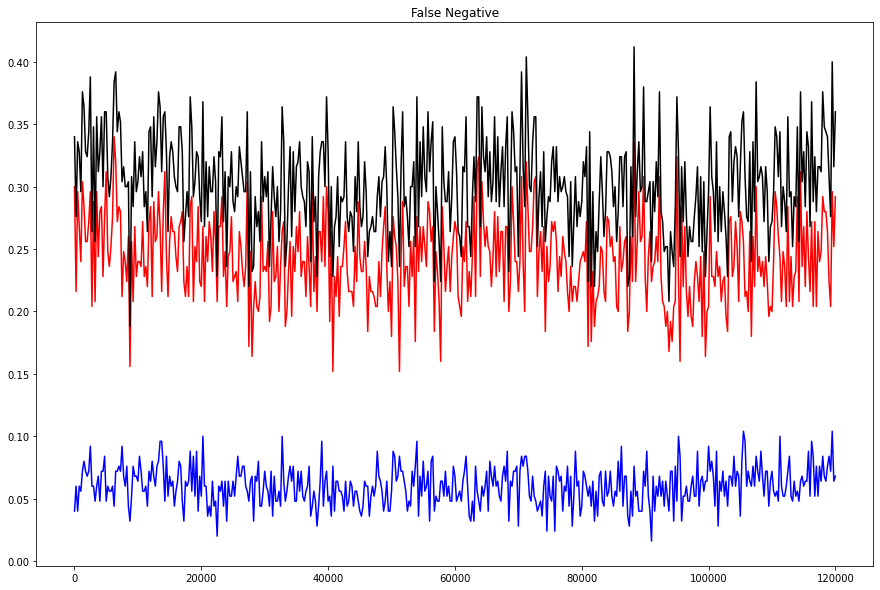

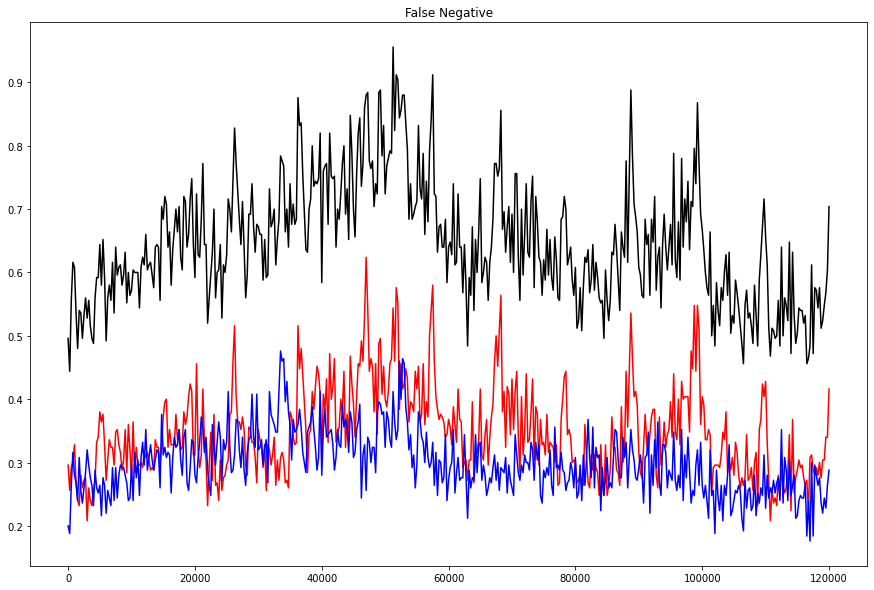

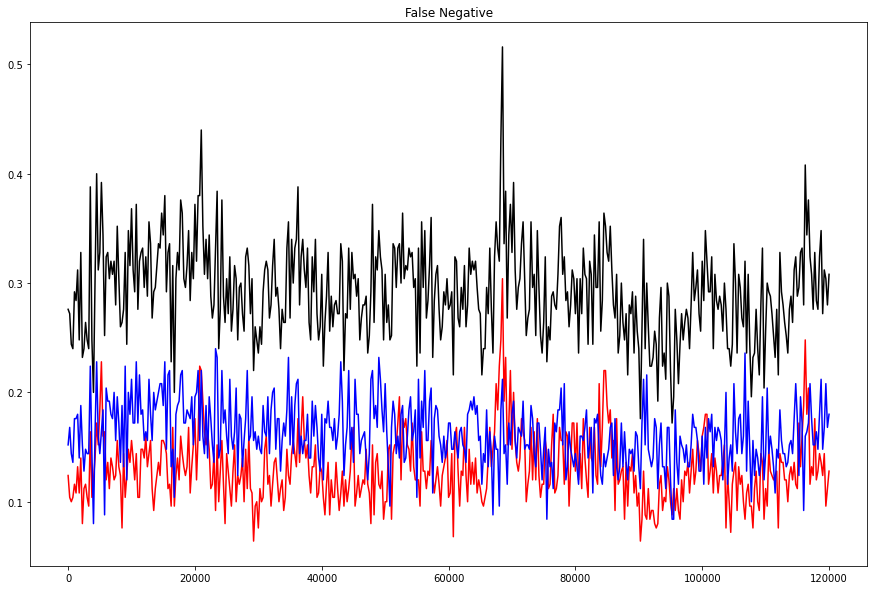

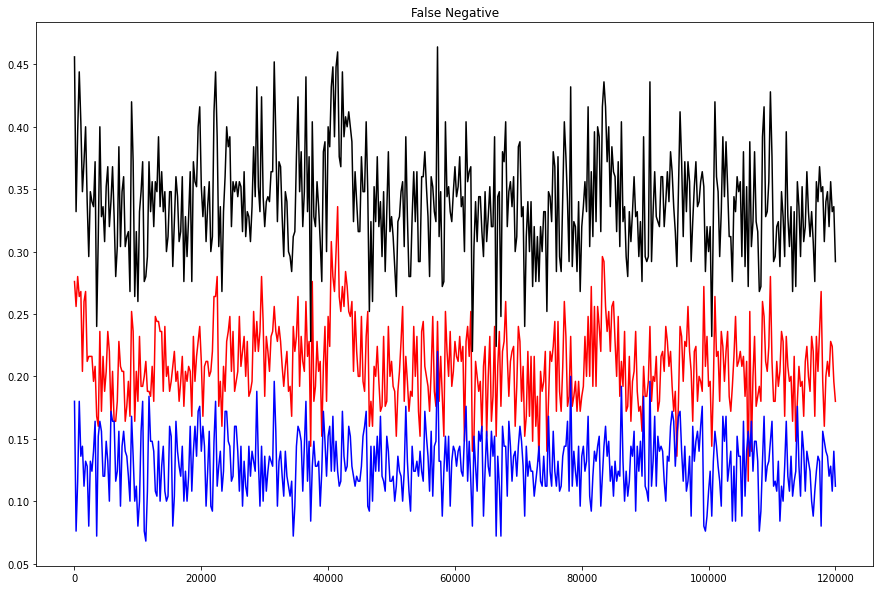

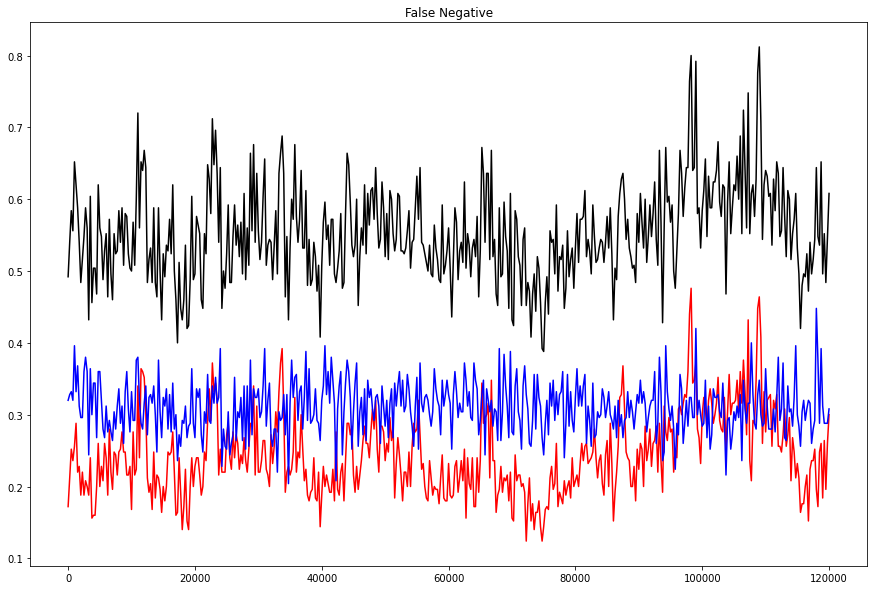

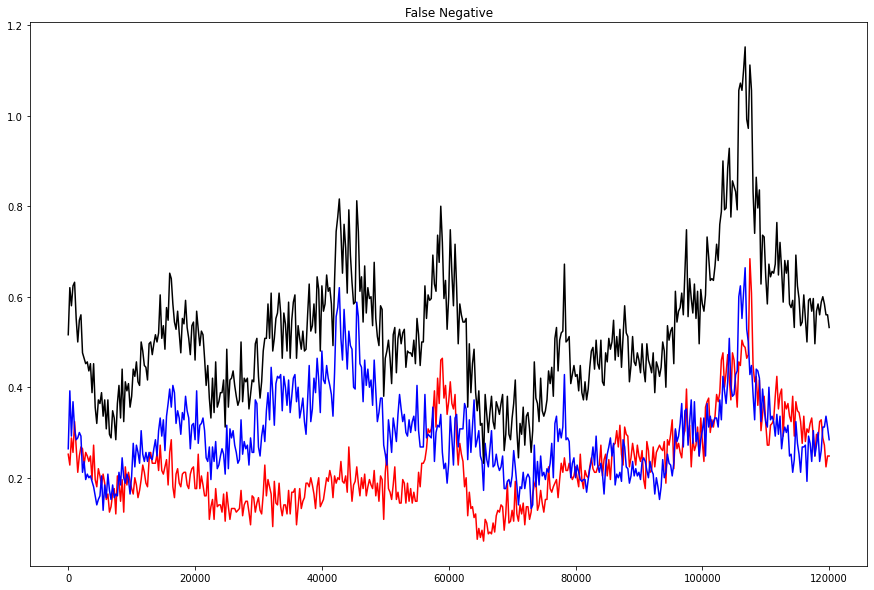

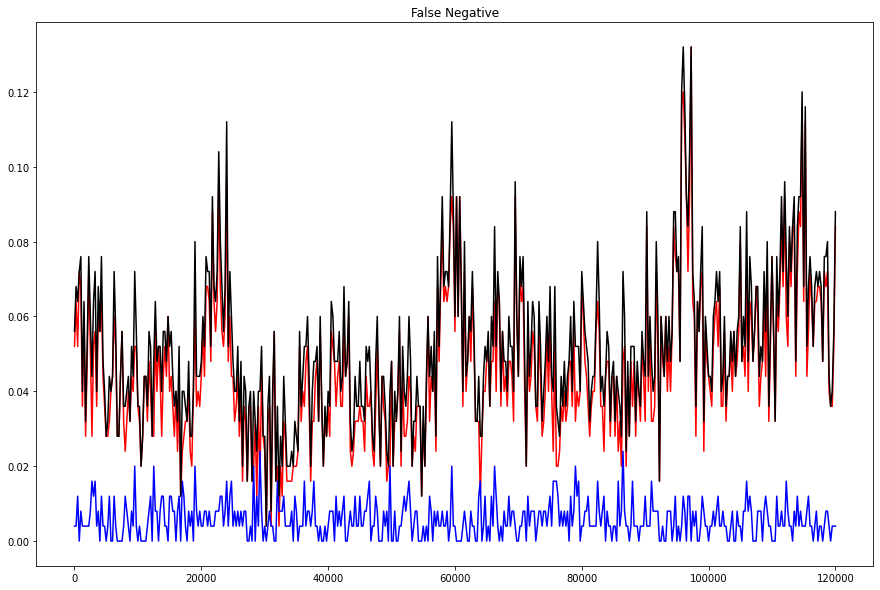

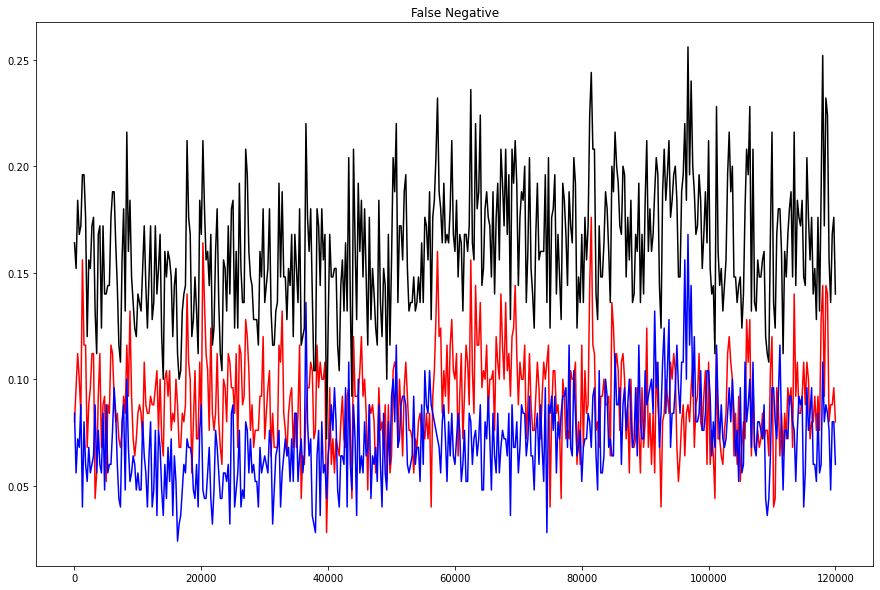

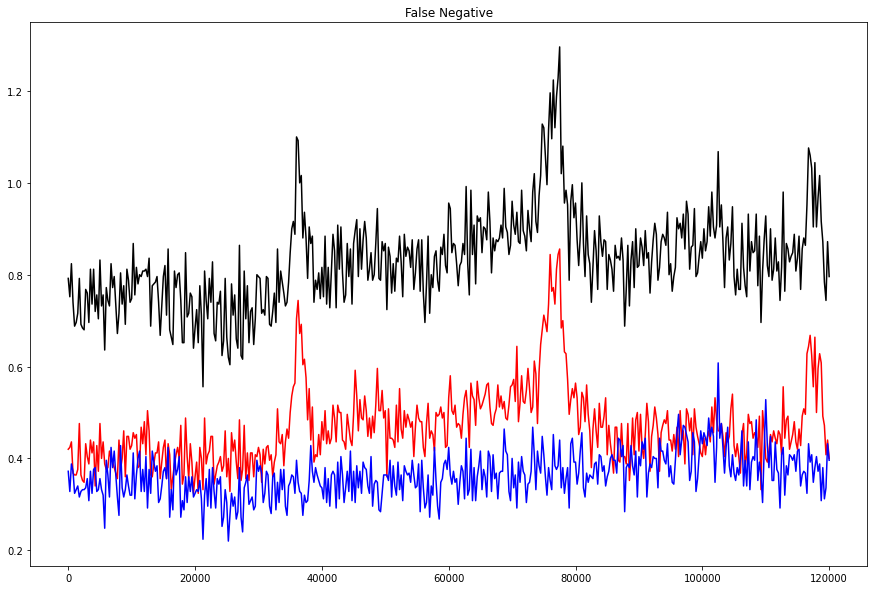

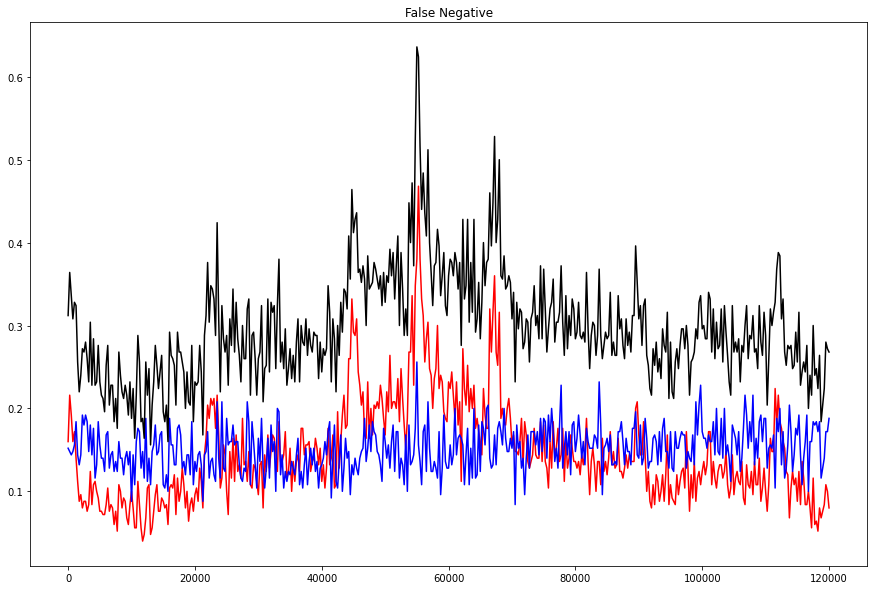

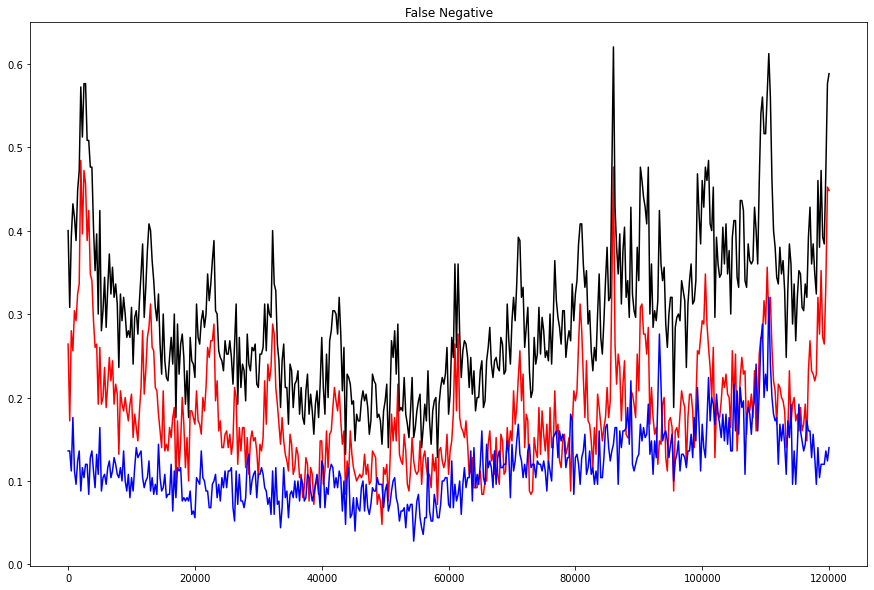

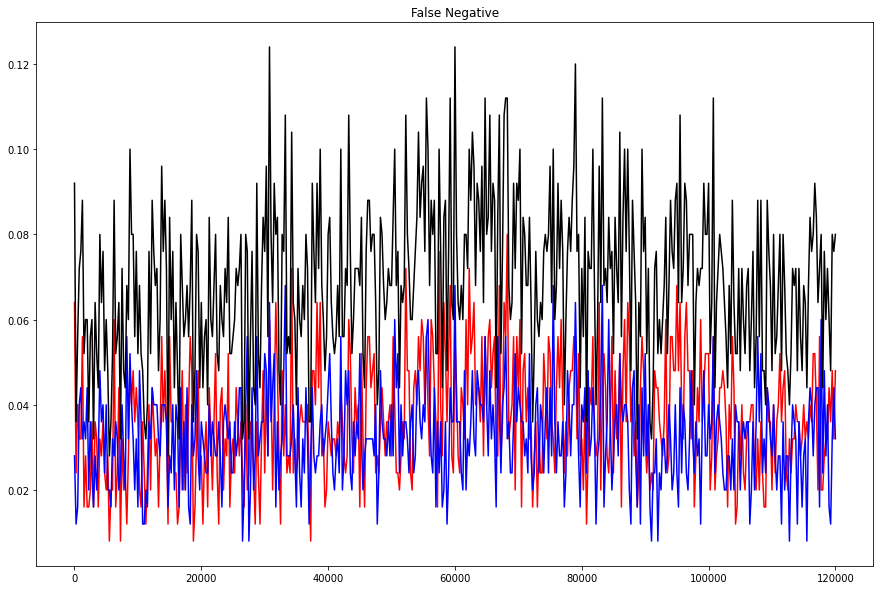

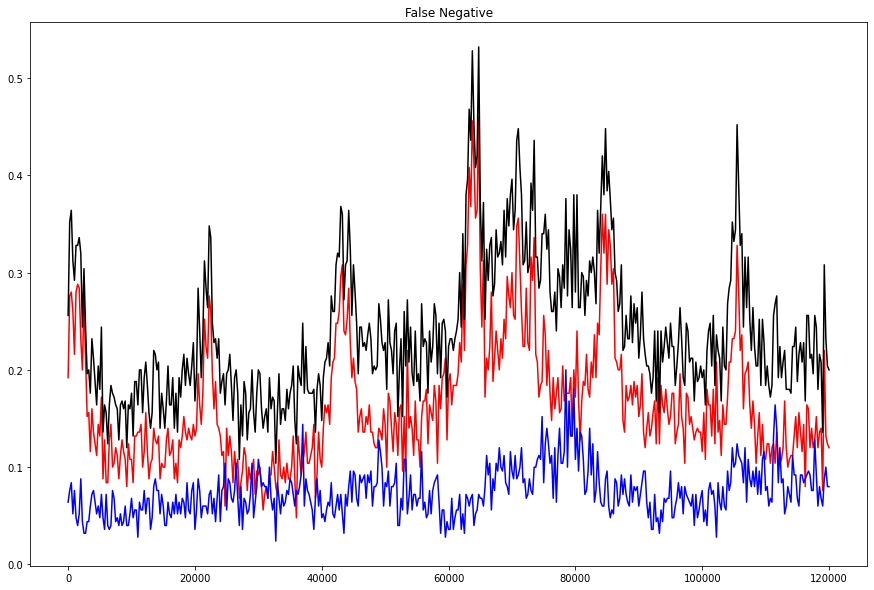

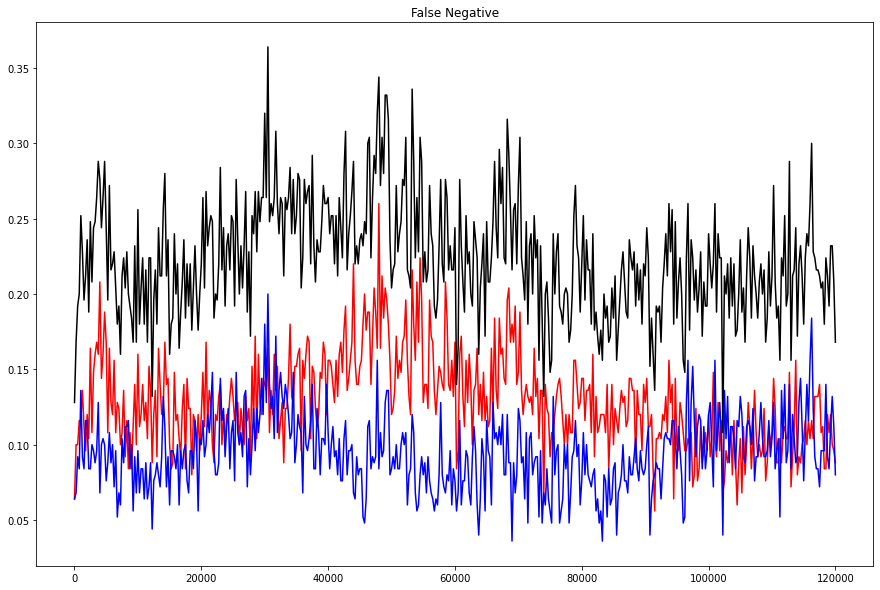

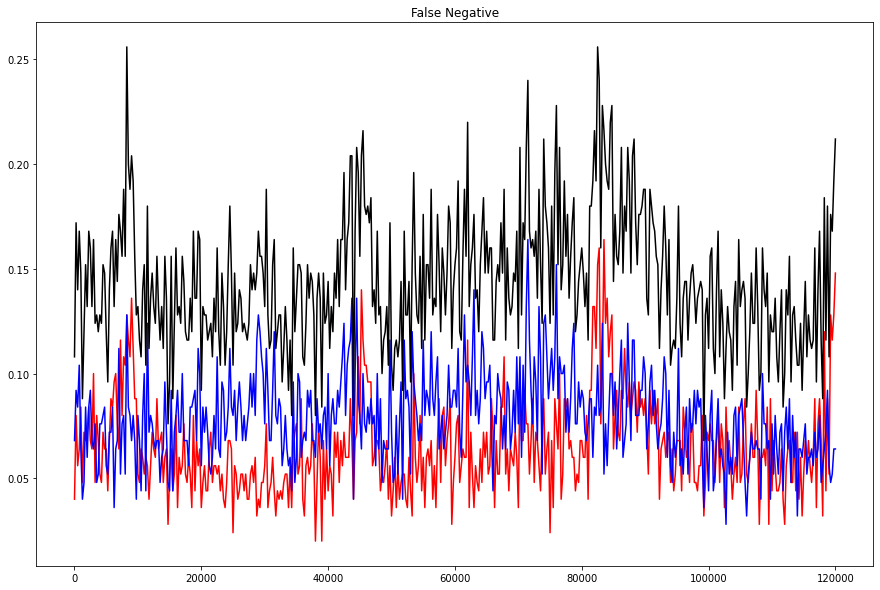

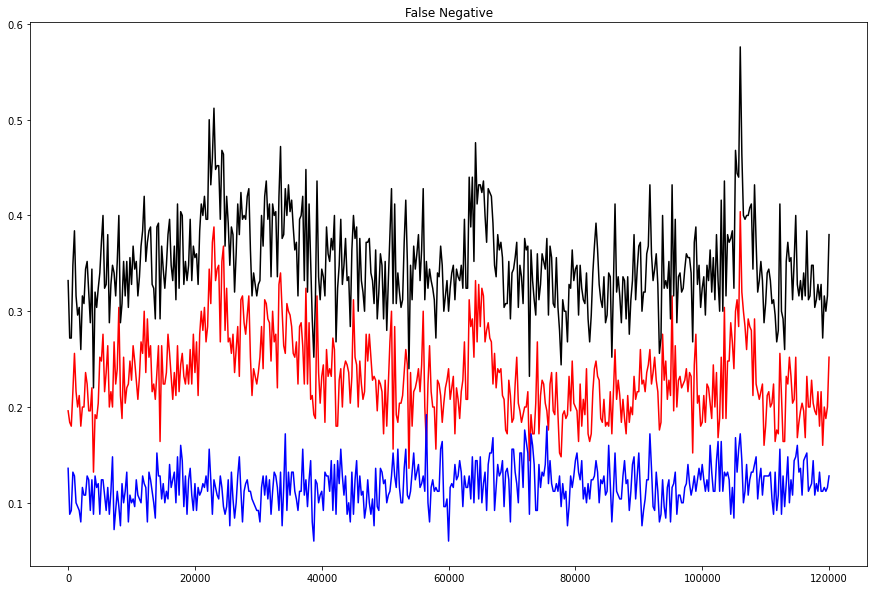

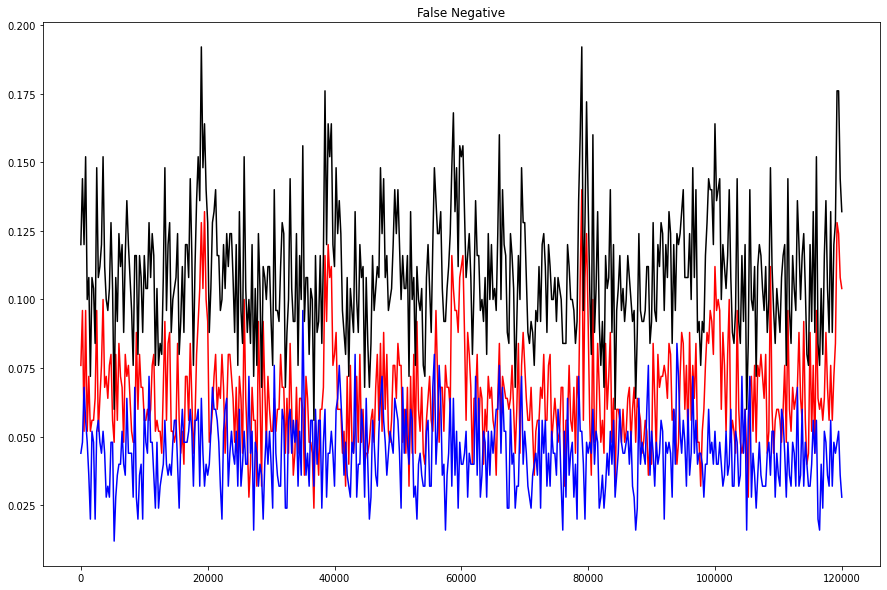

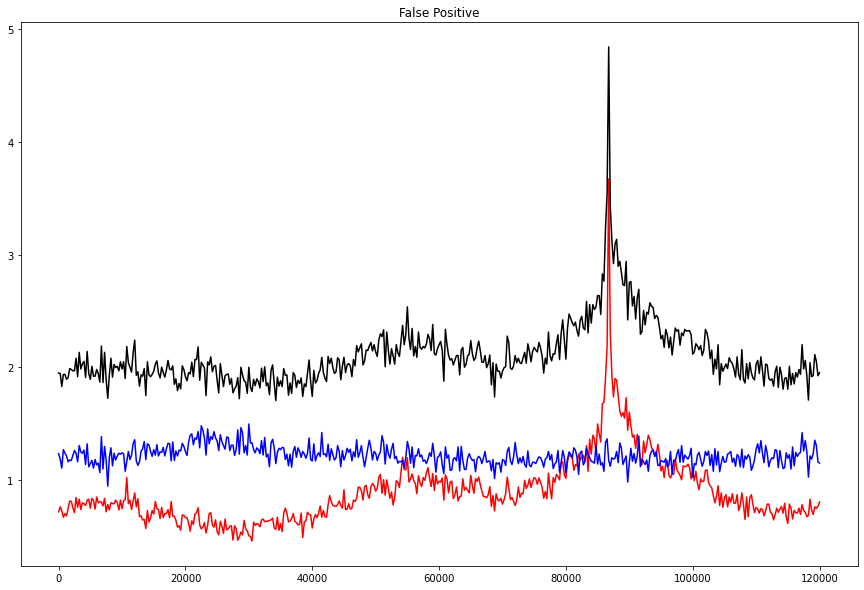

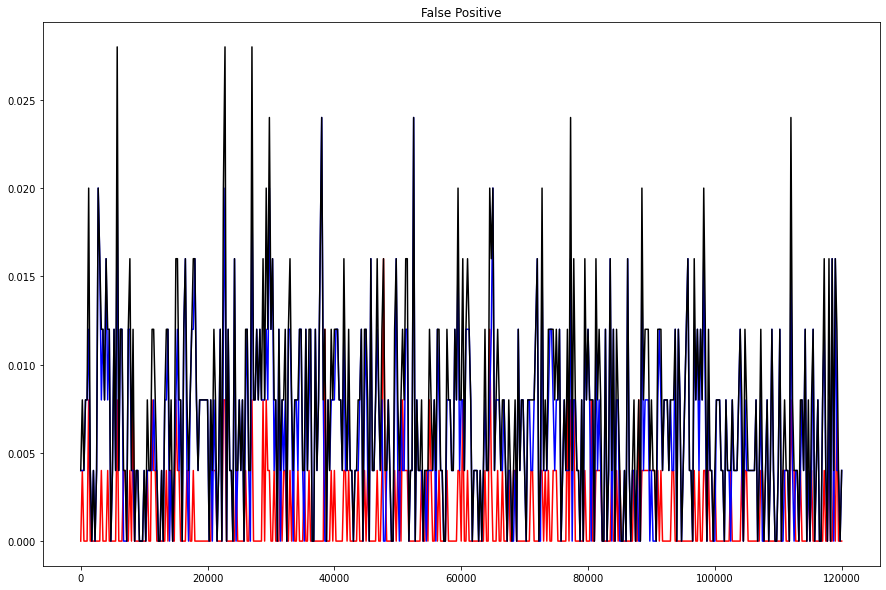

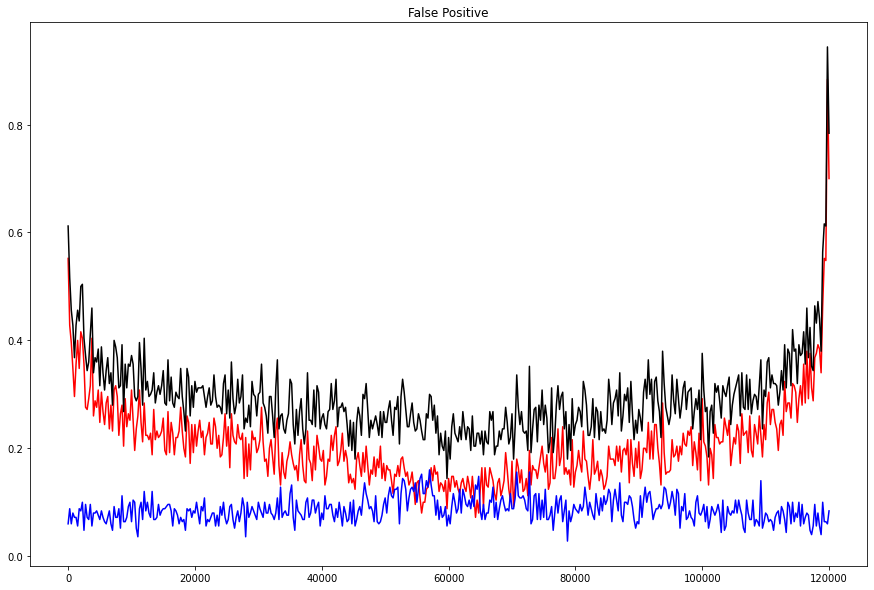

In [10]:
for i in bad_pred_lc_nos:
    if i < 10000:
        plt.plot(qpes_lc[0],qpes_lc[i+1],color='r')
        plt.plot(qpeh_lc[0],qpeh_lc[i+1],color='b')
        plt.plot(qpef_lc[0],qpef_lc[i+1],color='k')
        plt.title('False Negative')
        plt.show()
    if i >= 10000:
        plt.plot(npes_lc[0],npes_lc[i-9999],color='r')
        plt.plot(npeh_lc[0],npeh_lc[i-9999],color='b')
        plt.plot(npef_lc[0],npef_lc[i-9999],color='k')
        plt.title('False Positive')
        plt.show()

In [11]:
tsne_transform = TSNE().fit_transform(all_feats[:,1:127])


[]

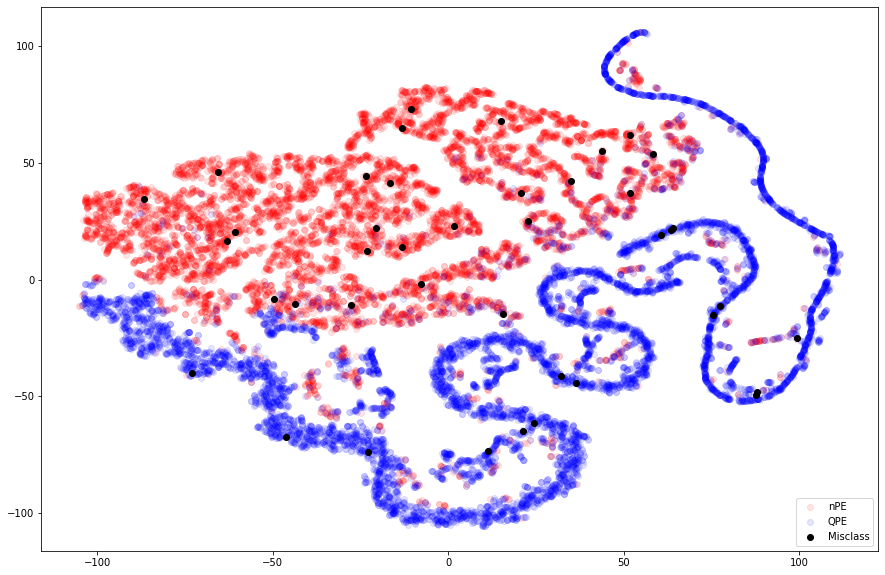

In [12]:
qpe_idxs = np.where(all_feats[:,-1] == 'QPE')[0]
npe_idxs = np.where(all_feats[:,-1] == 'nP')[0]
plt.scatter(tsne_transform[npe_idxs,0],tsne_transform[npe_idxs,1],color='r',alpha=0.1,label='nPE')
plt.scatter(tsne_transform[qpe_idxs,0],tsne_transform[qpe_idxs,1],color='b',alpha=0.1,label='QPE')
plt.scatter(tsne_transform[bad_pred_lc_nos,0],tsne_transform[bad_pred_lc_nos,1],color='k',label='Misclass')
plt.legend(loc='lower right')
plt.plot()